In [1]:
import scgenome.plotting as pl
import anndata

In [2]:
# file_path = "/Users/zemp/phd/scilife/mskcc_data/MM_GEO/patient_MM-03.h5ad"
# file_path = "/Users/zemp/PycharmProjects/victree/datasets/simul_k5a7n300m2012e50-4000d5mt1-2000-500-50.h5ad"
file_path = "../../datasets/simul_k5a7n500m5004e50-4000d5mt1-2000-500-50.h5ad"
ad = anndata.read_h5ad(file_path)

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
## changes chromosome names from 'chr3' to '3'
if 'chr' in str(ad.var['chr'].iloc[0]):
    chr_codes = {c: c[3:] for c in ad.var['chr'].unique()}
    ad.var['chr'] = ad.var['chr'].map(chr_codes)

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


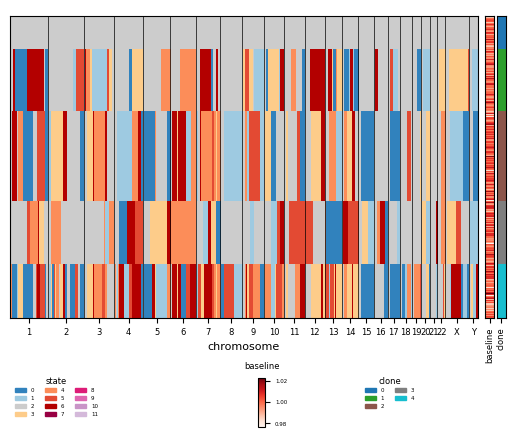

In [4]:
annotation_fields = None
cell_order_fields = None
if 'clone' in ad.obs:
    annotation_fields = ['baseline', 'clone']
    cell_order_fields = ['clone']
elif 'cluster_id' in ad.obs:
    annotation_fields = ['cluster_id']
    cell_order_fields = ['cluster_id']

g = pl.plot_cell_cn_matrix_fig(ad, 'state', max_cn=6, cell_order_fields=cell_order_fields, annotation_fields=annotation_fields)


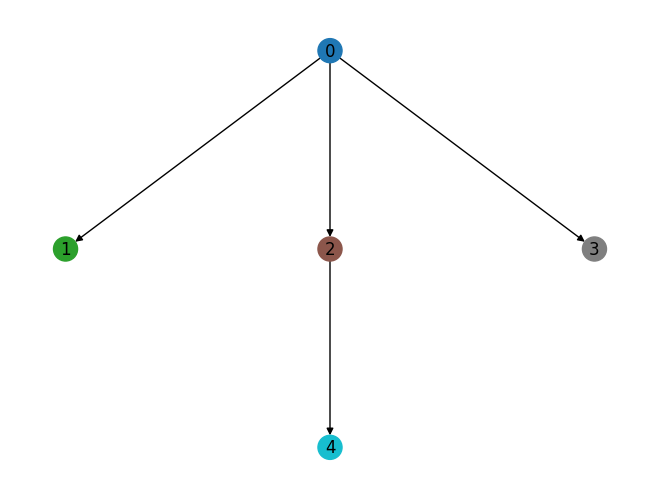

In [5]:
from io import StringIO
from utils.tree_utils import parse_newick, tree_to_newick
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

if 'tree-newick' in ad.uns:
    tree_newick =str(ad.uns['tree-newick'][0], 'UTF-8')
    tree = parse_newick(StringIO(tree_newick))
    pos = graphviz_layout(tree, prog='dot')
    nx.draw(tree, node_color=list(g['annotation_info']['clone']['level_colors'].values()), with_labels=True, pos=pos)

In [5]:
# ad.write_csvs("/Users/zemp/PycharmProjects/victree/datasets/corr_reads.csv")